In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

# Désactiver les avertissements Matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

# Template de style personnalisé inspiré de l'image
custom_style = {
    'axes.edgecolor': '#ffffff',
    'axes.facecolor': '#ffffff',
    'axes.grid': False,
    'grid.color': '#f0f0f0',
    'axes.labelcolor': '#000000',
    'text.color': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'figure.facecolor': '#ffffff',
    'font.size': 12,
    'legend.frameon': False,
    'legend.loc': 'best',  # Place la légende au meilleur emplacement
    # 'font.family': 'sans-serif',
    # 'font.sans-serif': ['Poppins Regular'],  # Spécifier Poppins comme police par défaut
    'axes.prop_cycle': plt.cycler('color', ['#69cdd8', '#d0f0f4', '#d3d3d3', '#808080', '#000000'])  # Palette de couleurs pour les objets graphiques
}

# Appliquer le style personnalisé
plt.rcParams.update(custom_style)

In [ ]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# URL de la police Poppins à télécharger
font_url = 'https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-Regular.ttf'
font_path = 'Poppins-Regular.ttf'

# Vérifier si la police est déjà téléchargée, sinon la télécharger
if not os.path.exists(font_path):
    print(f"Téléchargement de la police Poppins...")
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Police téléchargée et sauvegardée en tant que {font_path}")

In [ ]:
df = pd.read_csv('sondage.csv')

In [ ]:
print(len(df.columns))

105


In [ ]:
# replace unnamed cols with Nones so we can forward fill
columns = [col if 'Unnamed: ' not in col else None for col in df.columns]
questions = [col for col in df.columns if 'Unnamed: ' not in col]

In [ ]:
# fixes - not sure why need to remove the (select...): means we need to check!!
not_questions = ['respondent_id','collector_id','date_created', 'date_modified','ip_address', 'email_address', 'first_name','last_name','custom_1']
questions = [q.replace('(Sélectionnez toutes les réponses applicables)','').replace('(en heures)','') for q in questions if q not in not_questions]

In [ ]:
# forward fill questions where they are non, make it a list
columns = pd.Series(columns).fillna(method='ffill')
columns = list(columns)

<ipython-input-93-75e52bffafa5>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  columns = pd.Series(columns).fillna(method='ffill')


In [ ]:
# get the first row of data that contains question info, in a list
first_row = df.head(1).values[0]

In [ ]:
# ensure sizes are correct
print(len(first_row) == len(columns))

True


In [ ]:
# replace our nan values with "", i guess not necessary but it worked
first_row = [f if type(f) == str else "" for f in first_row]

In [ ]:
# concatenate the headers with the first row data, if no first row data just keep headers
new_headers = concatenated_list = [x + ' - ' + y if y != '' else x for x, y in zip(columns, first_row)]

In [ ]:
# use the new column names, remove the first row as it has been integrated
df.columns = new_headers
df = df.iloc[1:]

In [ ]:
# exports if u want
# df.to_csv('sondage_cleaned.csv', index=False)

In [ ]:
questions_df = [(q, df.loc[:, df.columns.str.contains(q)])
                for q in questions]

In [ ]:
# Voici les questions repondues:
print('Il y a '+str(len(questions))+' questions dans le sondage')
for question in questions_df:
  if len(question[1].columns) == 1:
    print(question[0])
  else:
    print(question[0])
    for subquestion in question[1].columns:
      print(subquestion.replace(question[0],""))

Il y a 17 questions dans le sondage
Quel est votre nom ?
S'il vous plaît, insérez votre adresse courriel chez Cellcom.
Quel est votre niveau de connaissance par rapport à l'IA en général ?
 - l'IA en général
 - ChatGPT
 - Copilot M365
 - Autre (préciser)
 - Préciser votre réponse
Comment percevez-vous le développement des outils d’IA dans le cadre de votre travail ?
Veuillez s'il-vous-plaît commenter votre réponse précédente.
À quelle fréquence utilisez-vous des outils d’IA dans votre travail?
Combien de temps les outils d’IA vous font-ils économiser par jour ?
 - Response
 - Plus que 2 heures (SVP préciser)
Quels sont les facteurs qui vous limitent dans l’utilisation des outils IA?
Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? 
(Sélectionnez toutes les réponses applicables) - Courriel
(Sélectionnez toutes les réponses applicables) - Documents Word
(Sélectionnez toutes les réponses applicables) - Feuilles de calcul Excel
(Sélectionnez tou

In [ ]:
# start evaluating each question!!
# - can use this to programmatically check info on people: i.e. dept, using code
#
n = 0
print(f'''Q{n+1} - ''' + questions_df[n][0])

Q1 - Quel est votre nom ?


In [ ]:
n = 1
print(f'''Q{n+1} - ''' + questions_df[n][0])

Q2 - S'il vous plaît, insérez votre adresse courriel chez Cellcom.


Q3 - Quel est votre niveau de connaissance par rapport à l'IA en général ?


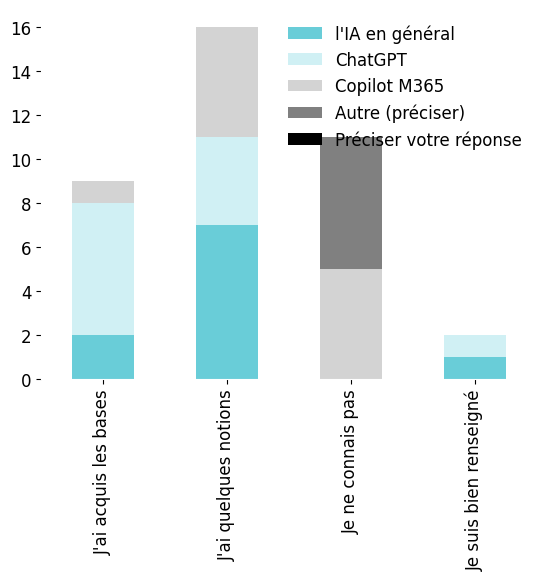

In [ ]:
n = 2
print(f'''Q{n+1} - ''' + questions_df[n][0])

# print(questions_df[2][1].head(5))
questions_df[n][1].columns = [q.split(' - ')[1] for q in questions_df[n][1].columns]
questions_df[n][1].apply(pd.Series.value_counts).fillna(0).plot(kind='bar', stacked=True);


Q3 - Comment percevez-vous le développement des outils d’IA dans le cadre de votre travail ?
[0.81818182 0.18181818]


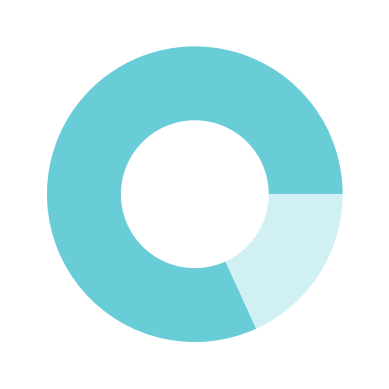

In [ ]:
n = 3
print(f'''Q{n} - ''' + questions_df[n][0])

print(questions_df[n][1][questions_df[n][1].columns[0]].value_counts(normalize=True).fillna(0).values)
questions_df[n][1][questions_df[n][1].columns[0]].value_counts().fillna(0).plot(kind='pie', wedgeprops=dict(width=0.5), startangle=0, labels=None)
plt.gca().set_axis_off()

# Afficher le graphique
plt.show();


In [ ]:
n = 4
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].sort_values(by=questions_df[n][1].columns[0], key=lambda x: x.str.len(), ascending=False)
# have API select the best ones!

Q4 - Veuillez s'il-vous-plaît commenter votre réponse précédente.


,Veuillez s'il-vous-plaît commenter votre réponse précédente. - Open-Ended Response
10,Je crois voir déjà plusieurs situations où je ...
1,Menace à l'intelligence humaine; peut-être pas...
2,Avec la multitude de taches que j'ai à accompl...
9,Je crois que l'AI prendra une place importante...
5,J'utilise IA pour des fonctionnalités de base ...
4,Je crois qu'il y a beaucoup de potentiel en te...
3,Je vois cela comme une opportunité pour m'aide...
7,Helping to collect data and information about ...
11,Beaucoup de départements pourront en profiter ...
8,Je vois cette technologie comme une ooprtunité...


Q5 - À quelle fréquence utilisez-vous des outils d’IA dans votre travail?


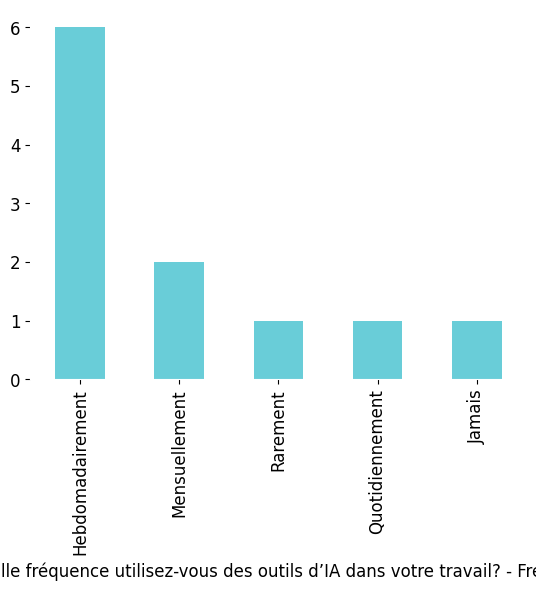

In [ ]:
n = 5
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].columns[0]].value_counts().fillna(0).plot(kind='bar');


Q6 - Combien de temps les outils d’IA vous font-ils économiser par jour ?


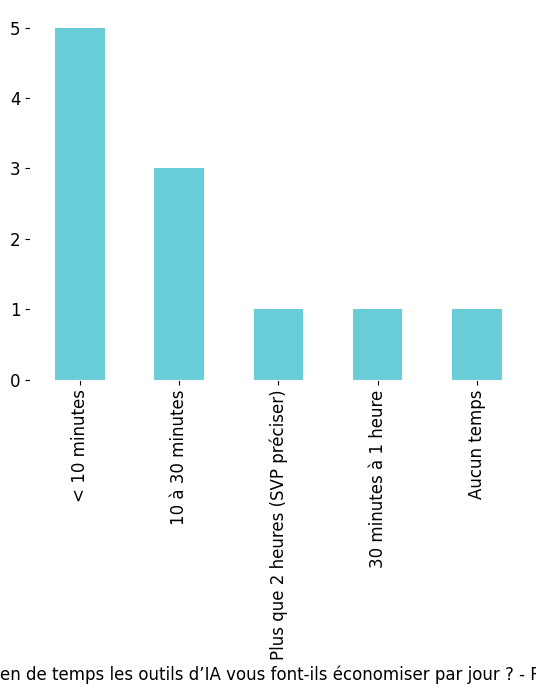

In [ ]:
n = 6
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].columns[0]].value_counts().fillna(0).plot(kind='bar');


In [ ]:
n = 6
print(f'''Q{n} - ''' + questions_df[n][0])
print([ans for ans in questions_df[n][1].iloc[:,1].values if type(ans) == str])

Q6 - Combien de temps les outils d’IA vous font-ils économiser par jour ?
["au lieu de me référer à certains livres au à Google IA est beaucoup plus éfficace et avantageau et plus d'accuracy"]


In [ ]:
n = 7
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].sort_values(by=questions_df[n][1].columns[0], key=lambda x: x.str.len(), ascending=False)
# use API to pull out the most important factors and provide quotes

Q7 - Quels sont les facteurs qui vous limitent dans l’utilisation des outils IA?


,Quels sont les facteurs qui vous limitent dans l’utilisation des outils IA? - Open-Ended Response
10,"Mes connaissances, clairement. Je m'y connais ..."
2,"license GPT de base, création graphique non co..."
6,Avoir plus de connaissances et donc pouvoir ma...
9,Connaissance des fonctionnalités dans certaine...
8,"Précisions des réponses, validation des source..."
4,Ne pas utiliser le bon prompts et obtenir une ...
11,"La connaissance des prompts, ne pas connaitre ..."
3,Je ne les connais pas beaucoup ou ne les maîtr...
7,"Translation, how to better communicate emails."
5,Manque de connaissance comment l'utiliser


Q8 - Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? 


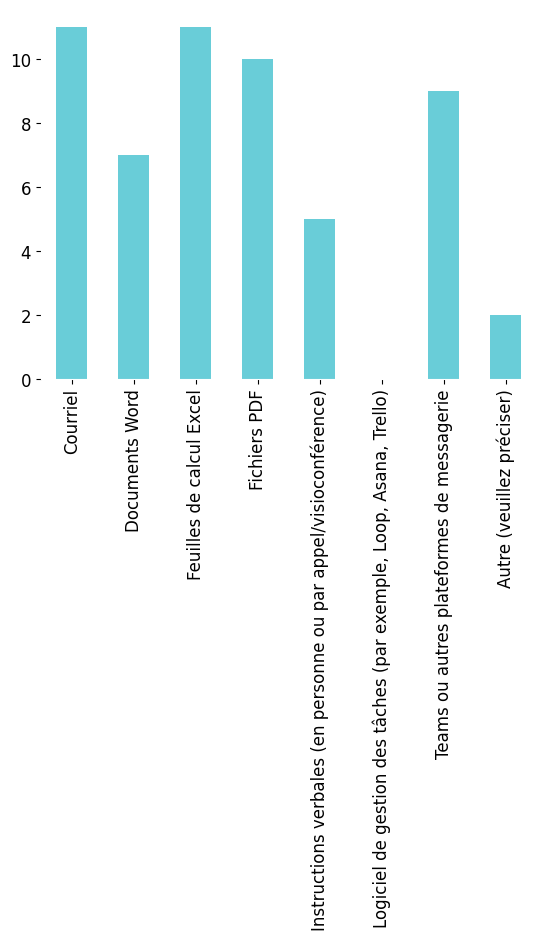

In [ ]:
n = 8
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].columns = [q.split(' - ')[1] for q in questions_df[n][1].columns]
questions_df[n][1].notnull().sum().plot(kind='bar');

In [ ]:
n = 8
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].iloc[:,-1].notnull()].iloc[:,-1]

Q8 - Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? 


,Autre (veuillez préciser)
2,"salesforce x 2 accounts,Apollo, textes, appels..."
9,Application de messagerie tel WhatsApp et Tele...


Q9 - Quels sont les principaux formats dans lesquels vous soumettez ou présentez votre travail ? 


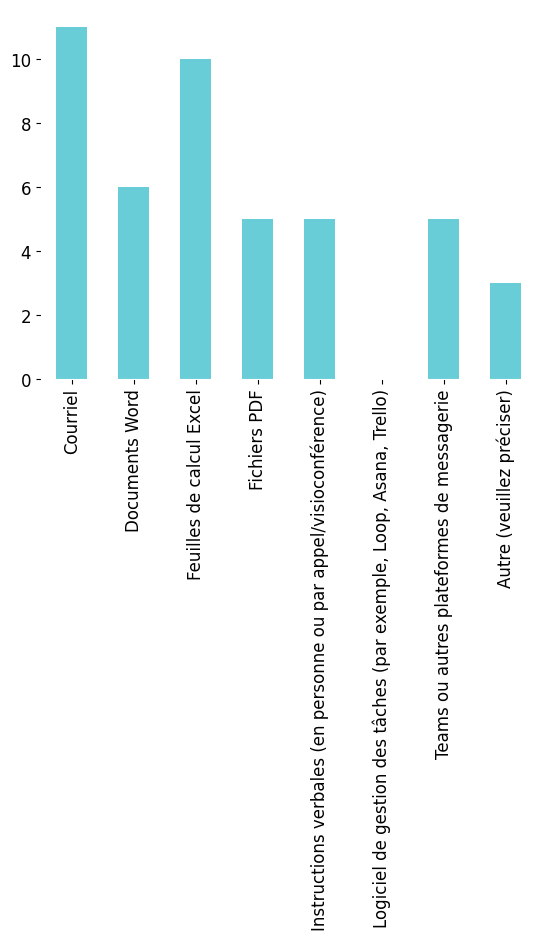

In [ ]:
n = 9
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].columns = [q.split(' - ')[1] for q in questions_df[n][1].columns]
questions_df[n][1].notnull().sum().plot(kind='bar');

In [ ]:
n = 9
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].iloc[:,-1].notnull()].iloc[:,-1]

Q9 - Quels sont les principaux formats dans lesquels vous soumettez ou présentez votre travail ? 


,Autre (veuillez préciser)
1,Powerpoint
2,"Powerpoints, Salesforce"
9,Application de messagerie tel WhatsApp et Tele...


Q10 - Effectuez-vous les tâches suivantes?


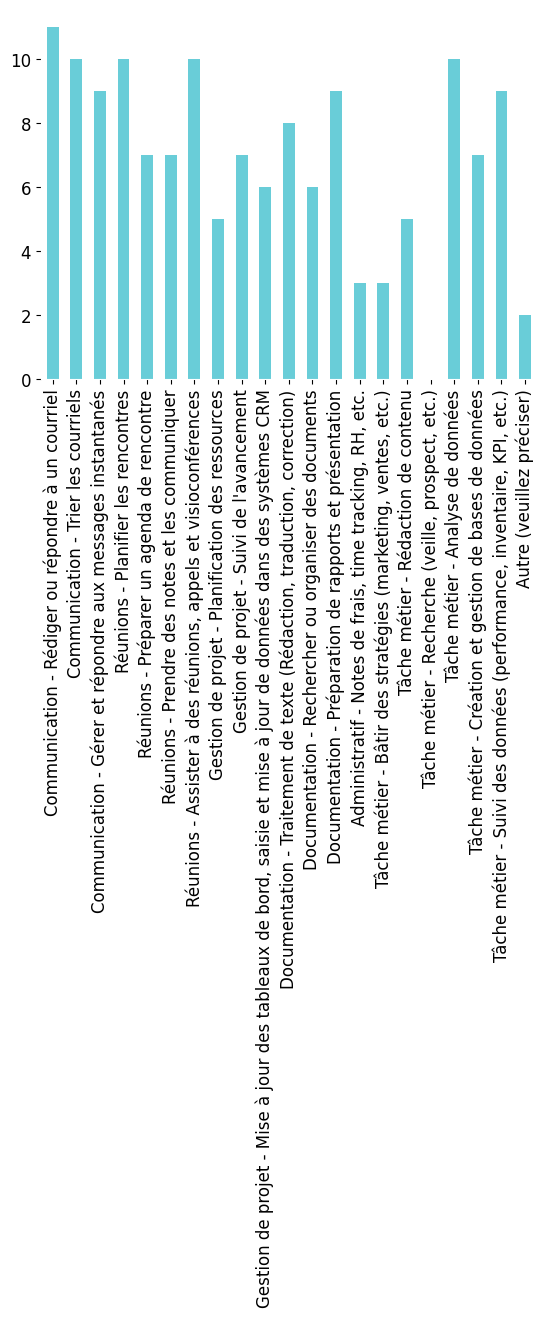

In [ ]:
n = 10
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].columns = [' - '.join(q.split(' - ')[1:]) for q in questions_df[n][1].columns]
questions_df[n][1].notnull().sum().plot(kind='bar');

In [ ]:
n = 10
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].iloc[:,-1].notnull()].iloc[:,-1]

Q10 - Effectuez-vous les tâches suivantes?


,Autre (veuillez préciser)
4,"Bâtir des budgets, faire des suivis budgétaire..."
9,Organisation d'évènements


In [ ]:
n = 11
print(f'''Q{n} - ''' + questions_df[n][0])

tache_temps_dict = {
    "< 1h" : 0.5,
    "1h" : 1,
    "2h" : 2,
    "3h" : 3,
    "4h" : 4,
    "5h" : 5,
    "6h" : 6,
    "7h" : 7,
    "8h" : 8,
    "9h" : 9,
    "10h" : 10,
    "> 10h" : 15,
}

for col in questions_df[n][1].columns:
  questions_df[n][1][col] = questions_df[n][1][col].apply(lambda x: float(tache_temps_dict[x]) if x in tache_temps_dict.keys() else x)

questions_df[n][1].columns = [' - '.join(q.split(' - ')[1:]) for q in questions_df[n][1].columns]
print(questions_df[n][1].sum())

Q11 - Combien de temps par semaine passez-vous en moyenne sur ces tâches  ?
Communication - Rédiger ou répondre à un courriel                                                               70.0
Communication - Trier les courriels                                                                             38.0
Communication - Gérer et répondre aux messages instantanés                                                      16.0
Réunions - Planifier les rencontres                                                                              9.0
Réunions - Préparer un agenda de rencontre                                                                       5.5
Réunions - Prendre des notes et les communiquer                                                                  5.5
Réunions - Assister à des réunions, appels et visioconférences                                                  84.5
Gestion de projet - Planification des ressources                                                         

<ipython-input-117-9e066ef680d3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df[n][1][col] = questions_df[n][1][col].apply(lambda x: float(tache_temps_dict[x]) if x in tache_temps_dict.keys() else x)


In [ ]:
n = 12
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q12 - Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ?


,"Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Communication - Rédiger ou répondre à un courriel","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Communication - Trier les courriels","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Communication - Gérer et répondre aux messages instantanés","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Réunions - Planifier les rencontres","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Réunions - Préparer un agenda de rencontre","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Réunions - Prendre des notes et les communiquer","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Réunions - Assister à des réunions, appels et visioconférences","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Gestion de projet - Planification des ressources","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Gestion de projet - Suivi de l'avancement","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Gestion de projet - Mise à jour des tableaux de bord, saisie et mise à jour de données dans des systèmes CRM",...,"Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Documentation - Rechercher ou organiser des documents","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Documentation - Préparation de rapports et présentation","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Administratif - Notes de frais, time tracking, RH, etc.","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Tâche métier - Bâtir des stratégies (marketing, ventes, etc.)","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Tâche métier - Rédaction de contenu","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Tâche métier - Recherche (veille, prospect, etc.)","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Tâche métier - Analyse de données","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Tâche métier - Création et gestion de bases de données","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - Tâche métier - Suivi des données (performance, inventaire, KPI, etc.)","Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ? - [Insert text from Other]"
1,Plutôt importante,Peu importante,Moyennement importante,Plutôt importante,Plutôt importante,Très importante,Très importante,Très importante,Très importante,Plutôt importante,...,Plutôt importante,Moyennement importante,Pas du tout importante,NaN,Moyennement importante,NaN,Moyennement importante,Moyennement importante,Moyennement importante,NaN
2,Très importante,Moyennement importante,Plutôt importante,Plutôt importante,Moyennement importante,Moyennement importante,Très importante,Plutôt importante,Plutôt importante,Plutôt importante,...,Plutôt importante,Très importante,Plutôt importante,Très importante,Plutôt importante,NaN,Plutôt importante,Plutôt importante,Très importante,NaN
3,Très importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Peu important

In [ ]:
n = 13
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q13 - Pouvez-vous apporter des commentaires sur ce qui est le plus important parmis ces tâches?


,Pouvez-vous apporter des commentaires sur ce qui est le plus important parmis ces tâches? - Open-Ended Response
1,Venant des opérations pour moi c'est bien comp...
2,"Tâche métier - Suivi des données (performance,..."
3,"Préparer les États financiers, analyser certai..."
4,"Du côté finance, tout ce qui touche l'analyse ..."
5,JE suis responsable de fournir une infromation...


In [ ]:
n = 14
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q14 - Quelles sont les tâches que vous avez identifiées pour lesquelles les outils IA pourraient vous aider?


,Quelles sont les tâches que vous avez identifiées pour lesquelles les outils IA pourraient vous aider? - Open-Ended Response
1,Suivi de projets avec différents employés et d...
2,"Tâche métier - Suivi des données (performance,..."
3,Traitement des courriels et Excel principaleme...
4,Tout ce qui touche la combinaison de données p...
5,dans toutes les tâches mentionnées


In [ ]:
n = 15
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q15 - Avez-vous des suggestions spécifiques pour l'adoption de l'IA dans votre département?


,Avez-vous des suggestions spécifiques pour l'adoption de l'IA dans votre département? - Open-Ended Response
1,Pas pour le moment.
2,Gestions des KPI via Salesforce et suivi des r...
3,"Principalement, pour améliorer nos process..."
4,- Rassembler des données de différente base de...
5,- tout le volet réconciliation des commissions...


In [ ]:
n = 16
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q16 - Un dernier commentaire?


,Un dernier commentaire? - Open-Ended Response
1,Un processus qu’on aimerait bien faire par le ...
2,Besoin de sauver du temps da la création de pr...
3,Merci pour la présentation. Je suis curieuse d...
4,NaN
5,NaN


In [ ]:
n = n
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q16 - Un dernier commentaire?


,Un dernier commentaire? - Open-Ended Response
1,Un processus qu’on aimerait bien faire par le ...
2,Besoin de sauver du temps da la création de pr...
3,Merci pour la présentation. Je suis curieuse d...
4,NaN
5,NaN
